<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0401_multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classifiers

#### Imports and important notes

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [2]:
import warnings
#warnings.filterwarnings('ignore')

#### Loading data

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

In [4]:
X, y = mnist.data, mnist.target

#### Exploring data

<ipython-input-5-3e1f38cd530b>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 10, i+1)


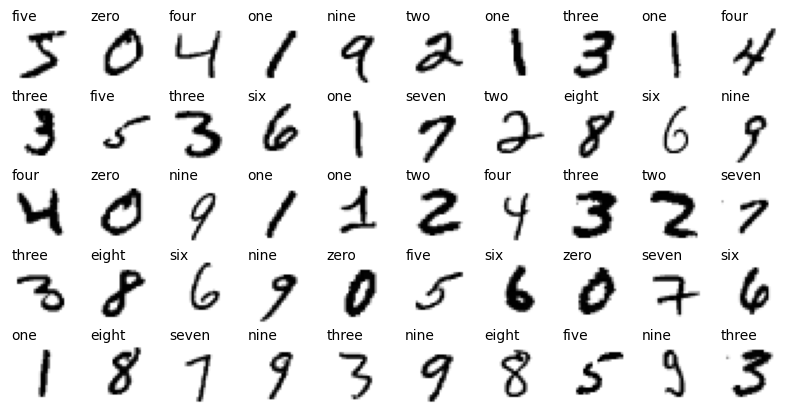

In [ ]:
plt.subplots(figsize=(10, 5))
labels = ["zero", "one", "two", "three", "four",
          "five", "six", "seven", "eight", "nine"]
for i in range(50):
    ax = plt.subplot(5, 10, i+1)
    idx = i #random.randint(0, 60000)
    ax.axis('off')
    ax.imshow(X[idx].reshape((28, 28)), cmap='gray_r')
    ax.text(0, 0, labels[int(y[idx])])
plt.show()

#### Partitioning Data

In [5]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val =  X[60000:], y[60000:]

## K Nearest Negihbours

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
y_train_large = (y_train >= '7')
y_train_even = (y_train.astype('int8') % 2 == 0)
y_multilabel = np.c_[y_train_large, y_train_even]

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [32]:
print(y_train[0])
knn_model.predict(X_train[:1])

5


array([[False, False]])

In [36]:
y_train_hat = cross_val_predict(knn_model, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_hat, average='macro')

0.9759401771580101